In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plot
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

In [102]:
path = '/content/drive/MyDrive/Assignment/Assignments/M1-assignment-datasets/HR_attrition/general_data.csv'

In [103]:
HR = pd.read_csv(path)

In [104]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [105]:
path1 = '/content/drive/MyDrive/Assignment/Assignments/M1-assignment-datasets/HR_attrition/employee_survey_data.csv'

In [106]:
ES = pd.read_csv(path1)

In [107]:
path2 = '/content/drive/MyDrive/Assignment/Assignments/M1-assignment-datasets/HR_attrition/manager_survey_data.csv'

In [108]:
MS = pd.read_csv(path2)

In [109]:
EMS = pd.merge(ES, MS)

In [110]:
EMS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   JobInvolvement           4410 non-null   int64  
 5   PerformanceRating        4410 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 241.2 KB


## **EDA (Exploratory Data Analysis)**

In [111]:
hr_df = pd.merge(HR, EMS)

In [112]:
hrdf = hr_df.drop_duplicates(subset = ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [113]:
hrdf.shape

(1498, 29)

In [114]:
hrdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1498 non-null   int64  
 1   Attrition                1498 non-null   object 
 2   BusinessTravel           1498 non-null   object 
 3   Department               1498 non-null   object 
 4   DistanceFromHome         1498 non-null   int64  
 5   Education                1498 non-null   int64  
 6   EducationField           1498 non-null   object 
 7   EmployeeCount            1498 non-null   int64  
 8   EmployeeID               1498 non-null   int64  
 9   Gender                   1498 non-null   object 
 10  JobLevel                 1498 non-null   int64  
 11  JobRole                  1498 non-null   object 
 12  MaritalStatus            1498 non-null   object 
 13  MonthlyIncome            1498 non-null   int64  
 14  NumCompaniesWorked      

In [115]:
#Numerical Data

hrdf.select_dtypes('int64' ,'float64').columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating'],
      dtype='object')

In [116]:
#Categorical Data

categorical_cols = hrdf.select_dtypes('object').columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

In [117]:
#Basic Statistics

hrdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1498.0,36.895861,9.123650,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,1498.0,9.173565,8.105717,1.0,2.00,7.0,14.00,29.0
Education,1498.0,2.914553,1.021827,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1498.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,1498.0,768.991322,501.575212,1.0,375.25,749.5,1123.75,4410.0
JobLevel,1498.0,2.064085,1.108613,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,1498.0,64934.566088,46863.756845,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,1479.0,2.697769,2.501137,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1498.0,15.206275,3.648488,11.0,12.00,14.0,18.00,25.0
StandardHours,1498.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [118]:
#missing data (NULL or Nan)
hrdf.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    11
JobSatisfaction             7
WorkLifeBalance            13
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [119]:
#Replacing value with fillna with the rounded up meamn value

hrdf.NumCompaniesWorked = hrdf.NumCompaniesWorked.fillna(3)
hrdf.EnvironmentSatisfaction = hrdf.EnvironmentSatisfaction.fillna(3)
hrdf.JobSatisfaction = hrdf.JobSatisfaction.fillna(3)
hrdf.WorkLifeBalance = hrdf.WorkLifeBalance.fillna(3)
hrdf.TotalWorkingYears = hrdf.TotalWorkingYears.fillna(11)

In [120]:
hrdf['NumCompaniesWorked'] = hrdf['NumCompaniesWorked'].astype(int)
hrdf['TotalWorkingYears'] = hrdf['TotalWorkingYears'].astype(int)
hrdf['EnvironmentSatisfaction'] = hrdf['EnvironmentSatisfaction'].astype(int)
hrdf['JobSatisfaction'] = hrdf['JobSatisfaction'].astype(int)
hrdf['WorkLifeBalance'] = hrdf['WorkLifeBalance'].astype(int)

In [121]:
# let's break down the columns by their type (i.e. int64, float64, object)
hrdf.columns.to_series().groupby(hrdf.dtypes).groups

{int64: ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']}

In [122]:
#no missing data (NULL or Nan)
hrdf.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

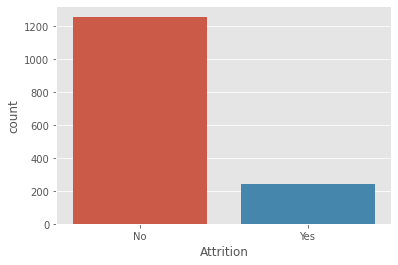

In [123]:
#Attrition Rate
#Yes, The attrition rates seems to be oddly abit high, and we will try to investigate this.

sns.countplot(x='Attrition', data = hrdf)
plt.show()

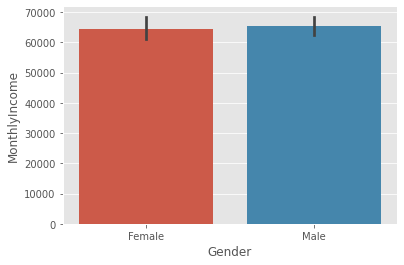

In [124]:
#Pay Gap Analysis
#We can see that the pay gap is no where to be found, as the difference is very small

sns.barplot(x = 'Gender',
            y = 'MonthlyIncome',
            data = hrdf)

plt.show()

Text(0.5, 1.0, 'Relationship Between Monthly Income, Gender and attrition')

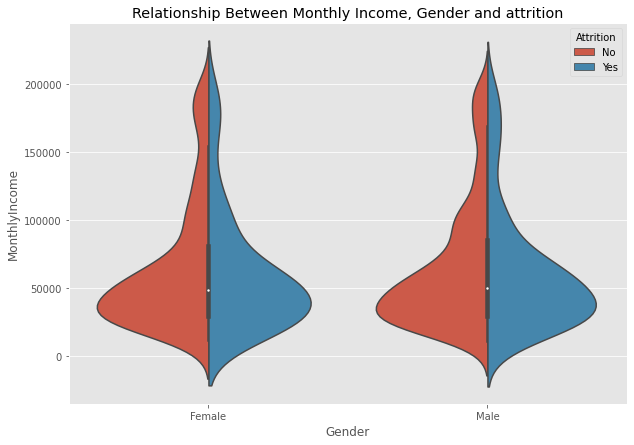

In [125]:
#Relationship between Monthly Income, Gender and attrition

#In the first place we found out that attrition rate is high when the salary is low and it went down when salary goes up. 
#But some male are more prone to leave the job even if they hold high salary compare to women. 
#On the other hand women showed stability with the increament in the salary.
#But in general, when both male and female earn more than 100k, then male wants more stability then women. 
#As the atrition rate is lower than female at that stage.

fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyIncome', title="Relation between Gender and Attrition", hue='Attrition',split=True, data=hrdf)
plt.title("Relationship Between Monthly Income, Gender and attrition")

Text(0.5, 1.0, 'Relationship Between Environment Satisfaction, Gender and attrition')

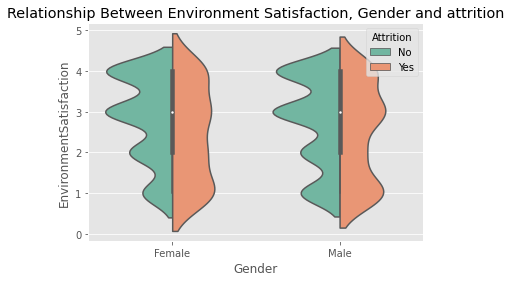

In [126]:
#relationship between Environment Satisfaction, Gender and attrition

#We found out that females with good environment are less likely to atrrition or take other oportunities, unlike males who are more likely for attrition at any kind of environment.

sns.violinplot(x='Gender', y='EnvironmentSatisfaction',hue='Attrition',split=True,palette = "Set2",data=hrdf)
plt.title("Relationship Between Environment Satisfaction, Gender and attrition")

In [127]:
#average age of the company

print(hrdf['Age'].mean())

36.895861148197596


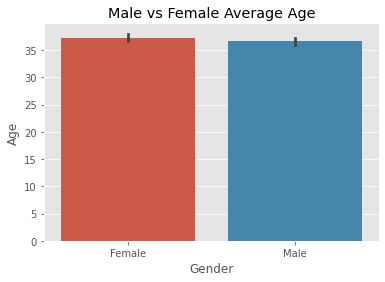

In [128]:
#Male & Female Average Age

sns.barplot(x = 'Gender',
            y = 'Age',
            data = hrdf)
plt.title("Male vs Female Average Age")
plt.show()

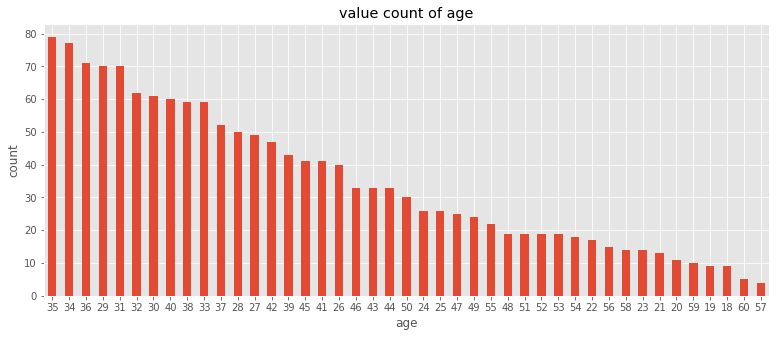

In [129]:
#Exact Age Group by Value Count

#It seems that the number of young people in the office is so high. Thus attrition rate is high as well. As younger looks for more opportunity than the older one.

plt.figure(figsize=(13,5))
hrdf.Age.value_counts().plot(kind="bar")
plt.title("value count of age")
plt.xlabel("age")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.show()

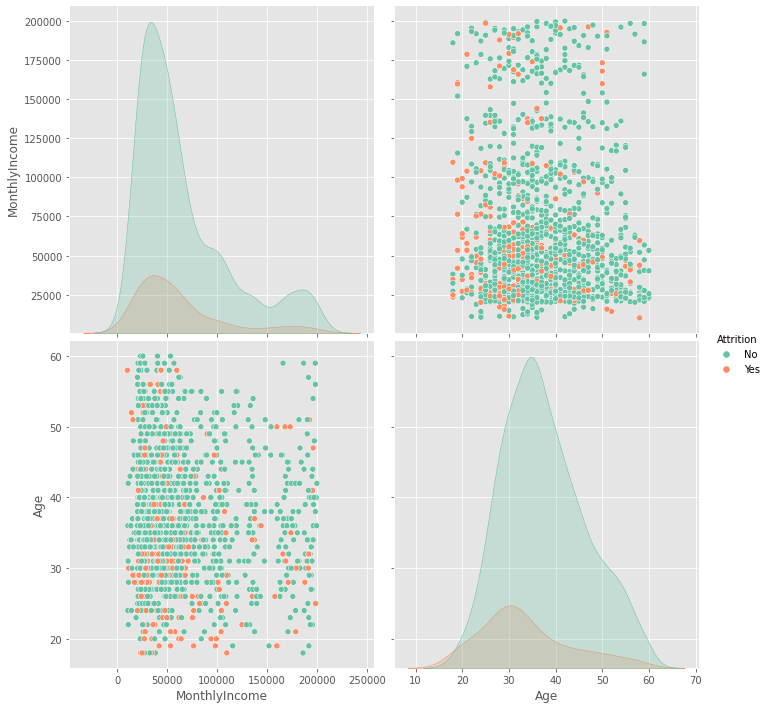

In [130]:
#Relationship Between Monthly Income, Age and Attrition
#Younger employees tend more to attrition as they are not attached to a stable life and have much more opportunitioes, unlike the older employees.

plt.style.use('ggplot')
g = sns.pairplot(hrdf, vars=["MonthlyIncome", "Age"],hue="Attrition", palette = 'Set2' ,height=5)

Text(0.5, 1.0, 'Relationship Between Monthly Income, Department and Attrition')

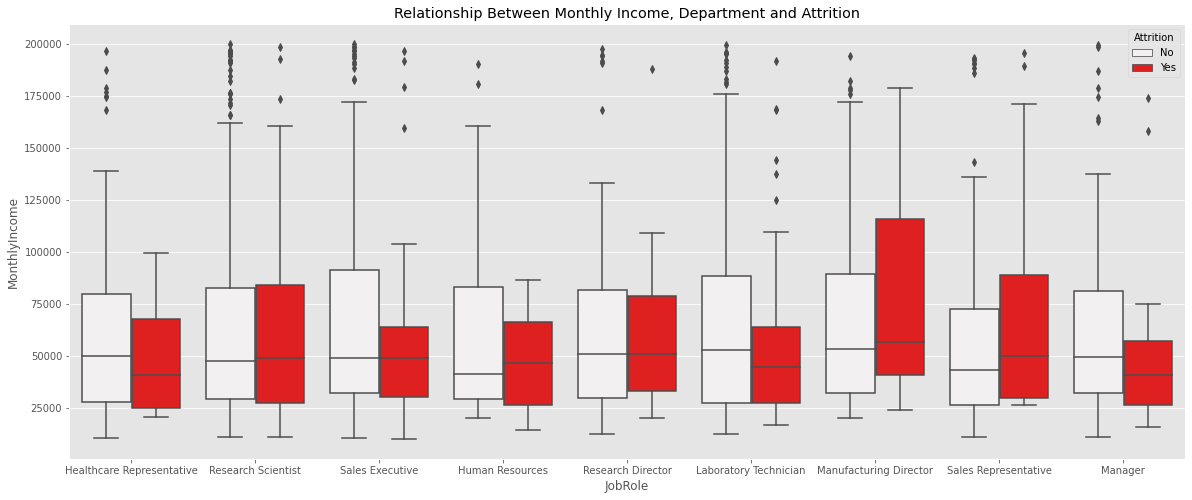

In [131]:
#Relationship Between Monthly Income, Department and Attrition
#The graph is showing the monthly income with attrition rate in the box plot.
#From this we can get to know after getting a certain level of salary why people is leaving the company or which department is sacking the employees.
# We also can know the turnover rate of the employee department wise and its reason whether it is salary or not.

plt.figure(figsize =(20 ,8))
sns.boxplot(x ='JobRole', y = 'MonthlyIncome' ,data = hrdf ,hue ='Attrition' ,color ='red')
plt.title("Relationship Between Monthly Income, Department and Attrition")

Text(0.5, 1.0, 'Relationship Between Monthly Job Level, Environmental Satisfaction and Attrition')

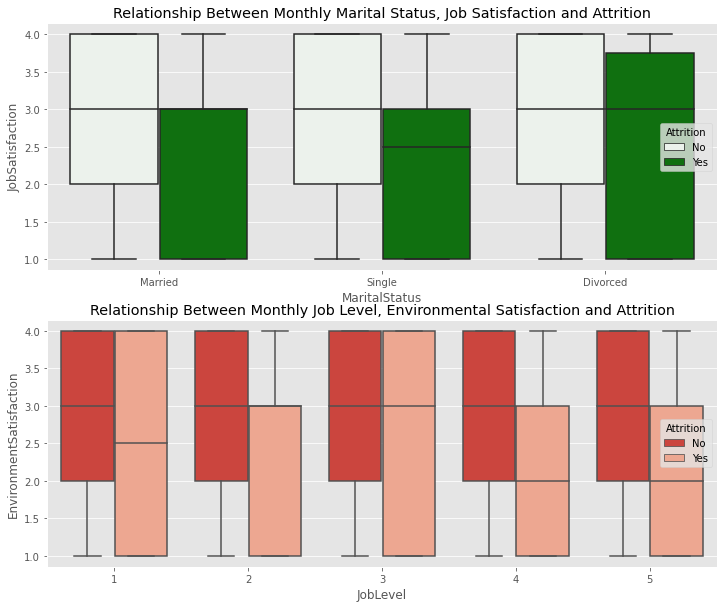

In [132]:
#From this 2 graph we will get to know the person who married and single are tend leave the job more.
#They have high environmental satisfaction but still they are looking for opportunity.
#On the other hand divorced status have high job satisfaction level and they have low attrition rate

plt.figure(figsize =(12,10))
plt.subplot(2,1,1)
sns.boxplot(x = 'MaritalStatus', y = 'JobSatisfaction', data = hrdf, hue = 'Attrition', color = 'g')
plt.title("Relationship Between Monthly Marital Status, Job Satisfaction and Attrition")


plt.subplot(2,1,2)
sns.boxplot(hrdf['JobLevel'],hrdf['EnvironmentSatisfaction'] ,hue = hrdf['Attrition'] ,palette='Reds_r')
plt.title("Relationship Between Monthly Job Level, Environmental Satisfaction and Attrition")

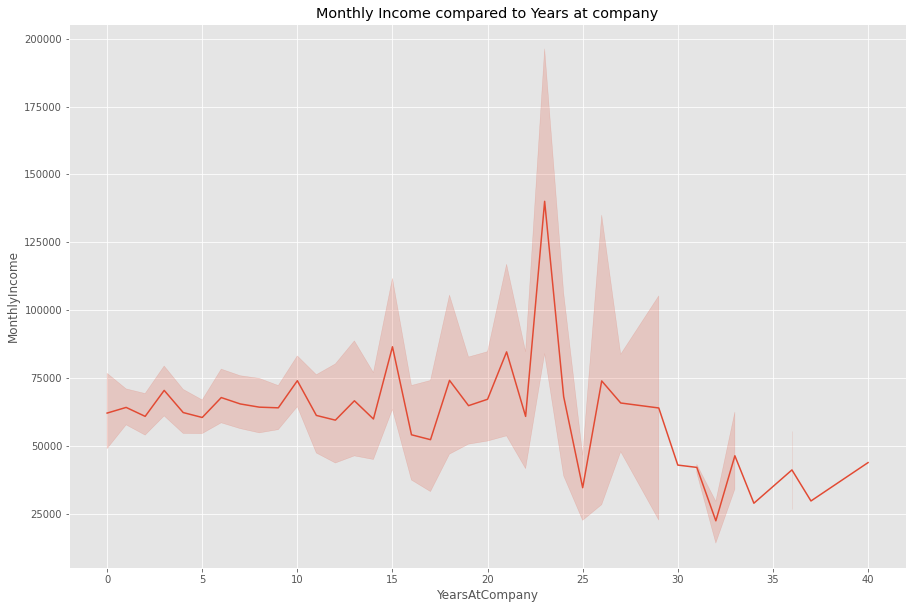

In [133]:
# Now we're going to look at years in company compared to salary
sns.lineplot(x = 'YearsAtCompany',
            y = 'MonthlyIncome',
            data = hrdf)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title('Monthly Income compared to Years at company')
plt.show()

In [134]:
# Who has been working in the company for 40 years?
hrdf.loc[hrdf['YearsAtCompany'] == 40]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1338,58,Yes,Travel_Rarely,Sales,2,2,Medical,1,1339,Female,1,Research Scientist,Married,43850,1,Y,13,8,1,40,2,40,15,6,4,4,2,2,3


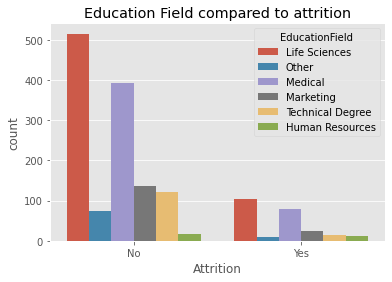

In [135]:
sns.countplot(x='Attrition', hue= 'EducationField', data = hrdf)
plt.title('Education Field compared to attrition')
plt.show()

Text(0.5, 1.0, 'Job Role compared to attrition')

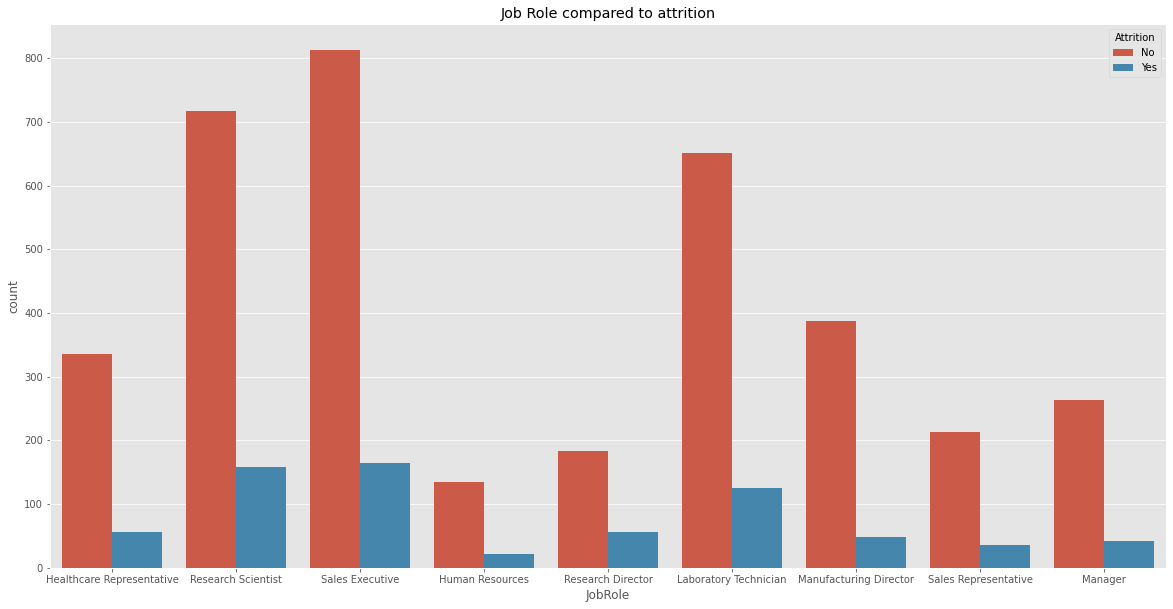

In [136]:
sns.countplot(x='JobRole', hue= 'Attrition', data = hr_df)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Job Role compared to attrition')

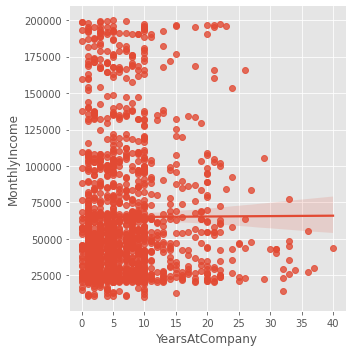

In [137]:
palette = sns.color_palette("rocket_r")
sns.lmplot(x = 'YearsAtCompany', y = 'MonthlyIncome', data = hrdf, palette = palette)
plt.show()

In [138]:
hrdf.groupby(['Department', 'JobSatisfaction', 'Attrition']).mean()

Age  DistanceFromHome  \
Department             JobSatisfaction Attrition                                
Human Resources        1               No         38.100000          8.000000   
                                       Yes        37.400000          6.000000   
                       2               No         35.750000         11.125000   
                                       Yes        28.666667          9.000000   
                       3               No         37.900000          4.200000   
                                       Yes        33.000000         10.600000   
                       4               No         37.687500          8.562500   
                                       Yes        39.800000          9.000000   
Research & Development 1               No         38.333333          9.326797   
                                       Yes        32.428571         10.714286   
                       2               No         37.875000          9.062500   
                                       Yes        34.827586         11.068966   
                       3               No         37.580000          9.268000   
                                       Yes        32.764706          8.117647   
                       4               No         37.567050          8.996169   
                                       Yes        32.030303          9.333333   
Sales                  1               No         37.387097          8.774194   
                                       Yes        34.473684          7.052632   
                       2               No         37.211268          8.408451   
                                       Yes        31.461538          8.076923   
                       3               No         37.677686         10.768595   
                                       Yes        36.850000          9.200000   
                       4               No         36.278195          9.218045   
                                       Yes        35.200000          5.600000   

                                                  Education  EmployeeCount  \
Department             JobSatisfaction Attrition                             
Human Resources        1               No          2.900000            1.0   
                                       Yes         3.600000            1.0   
                       2               No          3.000000            1.0   
                                       Yes         2.666667            1.0   
                       3               No          2.800000            1.0   
                                       Yes         3.000000            1.0   
                       4               No          2.875000            1.0   
                                       Yes         3.600000            1.0   
Research & Development 1               No          2.921569            1.0   
                                       Yes         2.976190            1.0   
                       2               No          2.975000            1.0   
                                       Yes         2.517241            1.0   
                       3               No          2.904000            1.0   
                                       Yes         2.901961            1.0   
                       4               No          2.908046            1.0   
                                       Yes         2.909091            1.0   
Sales                  1               No          2.806452            1.0   
                                       Yes         3.315789            1.0   
                       2               No          2.845070            1.0   
                                       Yes         2.615385            1.0   
                       3               No          3.000000            1.0   
                                       Yes         2.650000            1.0   
                       4               No          2.924812            1.0   

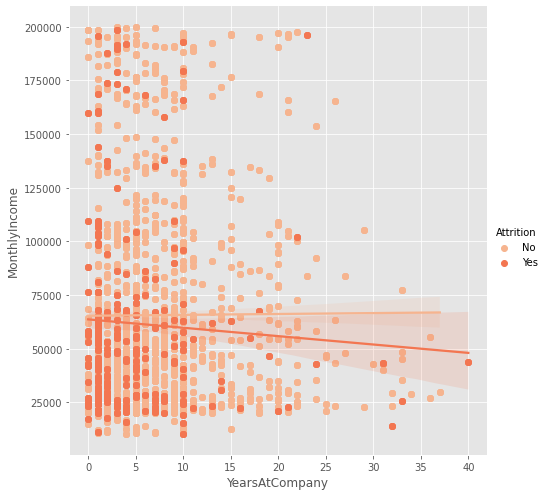

In [198]:
#here we are witnessing that people with low monthly income and less year at company tend to leave the job.
#The more they started to get paid the more they stay and this is the same case for years at company as well.

g = sns.lmplot(x="YearsAtCompany",
               y="MonthlyIncome",
               hue="Attrition",
               height=7,
               data=hr_df,
                scatter_kws={'alpha':1},
               palette=palette)
g.set_xlabels('YearsAtCompany')
g.set_ylabels('MonthlyIncome')

<Figure size 288x144 with 0 Axes>

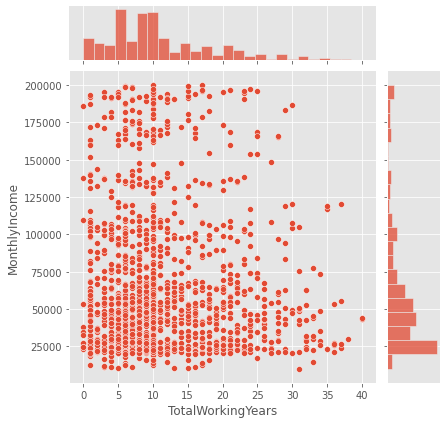

In [140]:
#We can see the more experinced employees have higher income

plt.figure(figsize=(4,2))
plt.style.use('ggplot')
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=hrdf)

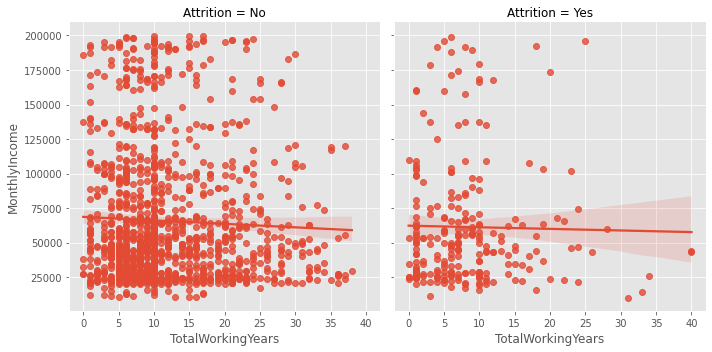

In [141]:
#We can see that the employees who had more years, more experience in the company are more attached to their jobs, 
#as they also have a higher monthly income, unlike the employees who had less total working years.

palette = sns.color_palette("rocket_r")
sns.lmplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = hrdf, palette = palette, col = 'Attrition')
plt.show()

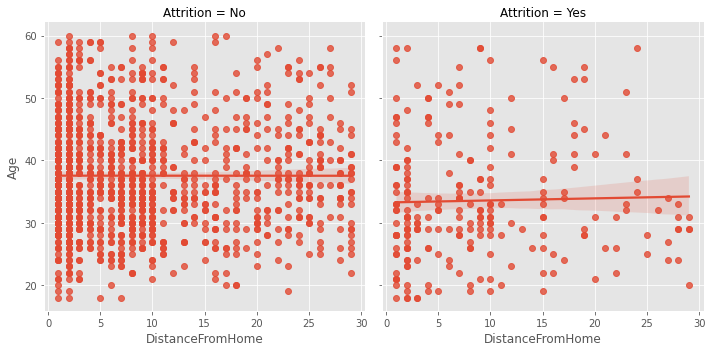

In [142]:
palette = sns.color_palette("rocket_r")
sns.lmplot(x = 'DistanceFromHome', y = 'Age', data = hrdf, palette = palette, col = 'Attrition')
plt.show()

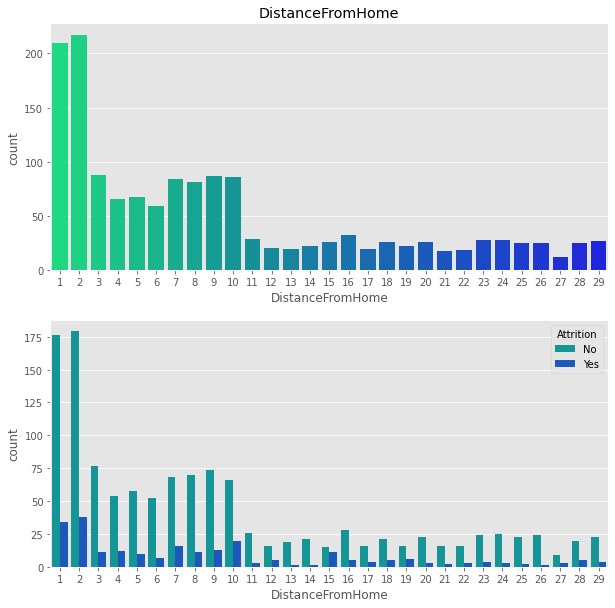

In [143]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
sns.countplot(x= 'DistanceFromHome' ,data =hrdf ,palette='winter_r')
plt.title('DistanceFromHome')
plt.subplot(2,1,2)
sns.countplot(x= 'DistanceFromHome' ,data = hrdf ,palette='winter_r'  ,hue =hrdf['Attrition'])

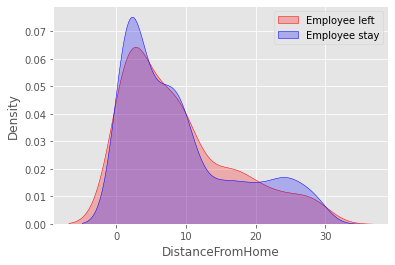

In [144]:
#between 10-20 km people tend to stay more
#between 20-30 km people tend to leave more
#between 30-40 km people tend to stay more


df_left=hrdf[hrdf[ 'Attrition']== "Yes"]['DistanceFromHome'] 
df_stay=hrdf[hrdf[ 'Attrition']=="No"]['DistanceFromHome'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b')
plt.legend()
plt.show()

## **Supervise Machine Learning (SML)**

## **Data Preprocessing**

###**Target Variable: Attrition**

The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history.

In [145]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
hrdf['Attrition'].value_counts()

No     1255
Yes     243
Name: Attrition, dtype: int64

In [146]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    hrdf[hrdf['Attrition'] == 'No'].shape[0] / hrdf.shape[0]*100,
    hrdf[hrdf['Attrition'] == 'Yes'].shape[0] / hrdf.shape[0]*100))

Percentage of Current Employees is 83.8% and of Ex-employees is: 16.2%


As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

**Correlations**

Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [147]:
# Find correlations with the target and sort
hrdf_trans = hrdf.copy()
hrdf_trans['Target'] = hrdf_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
hrdf_trans = hrdf_trans.drop(
    ['Attrition', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)
correlations = hrdf_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 EmployeeID           -0.000332
PerformanceRating     0.019386
PercentSalaryHike     0.030720
NumCompaniesWorked    0.041915
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears         -0.172369
Age                       -0.161552
YearsWithCurrManager      -0.160601
YearsAtCompany            -0.138453
EnvironmentSatisfaction   -0.104168
Name: Target, dtype: float64


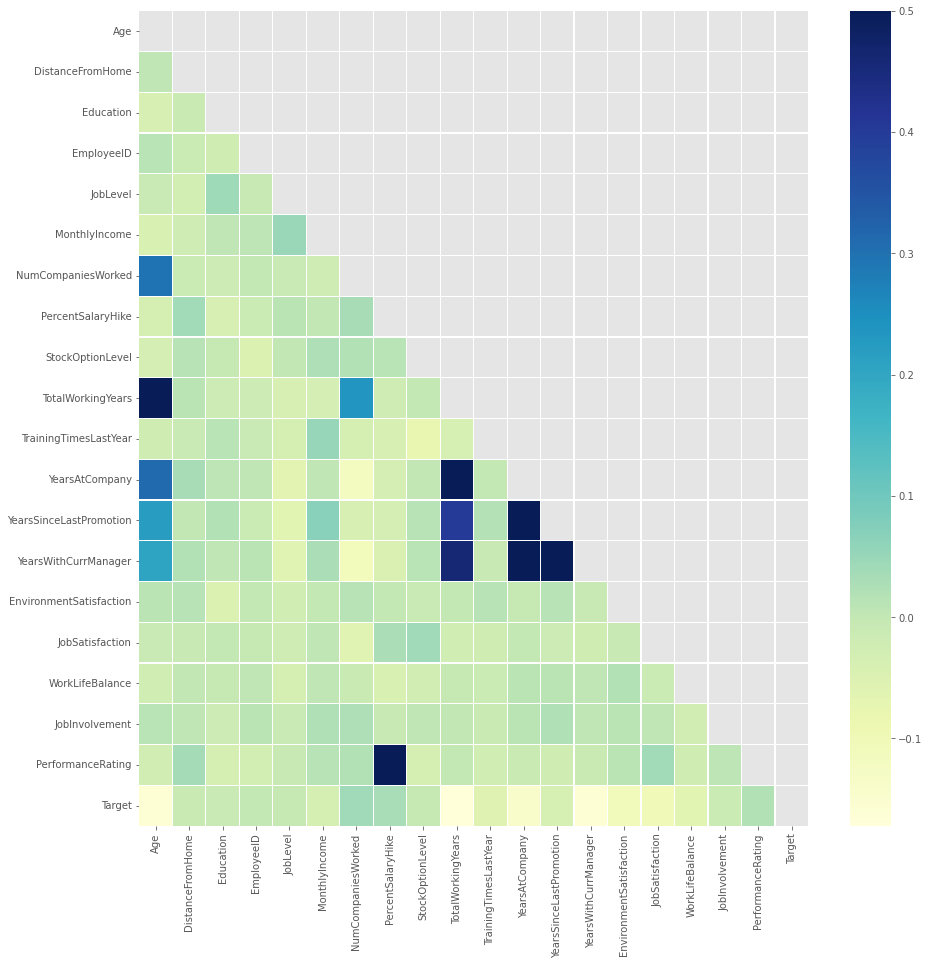

In [200]:
# Calculate correlations
corr = hrdf_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

**Let's summarise the findings from this EDA:**

1. The dataset does not feature any missing or erroneous data values, and all features are of the correct data type. 
2. There were some duplicate values. We removed it for our EDA, UML & SML. With duplicate value there were different sort of results (Every row had 2 exactly same rows. Befor removing duplicate values we measured the attrition value like #yes and #no percentage. After confirming the same weight of yes and no of duplicate values, we just removed that from our data set).
3. We removed the NAN values from some columns of the data set.
4. The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
5. The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
6. The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
7. Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

**Other observations include:**

1. Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
2. About 10% of leavers left when they reach their 2-year anniversary at the company.
3. Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.
4. People who live further away from their work show higher proportion of leavers compared to their counterparts.
5. People who travel frequently show higher proportion of leavers compared to their counterparts.
6. People who have to work overtime show higher proportion of leavers compared to their counterparts.
7. Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.
8. Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.

## **Pre-processing Pipeline**

In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation.

### **Encoding**

Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values, we will use both Lable Encoding and One-Hot Encoding as shown below.

In [149]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [150]:
print(hrdf.shape)
hrdf.head()

(1498, 29)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,4,2,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,3,2,4,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,2,2,1,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,4,4,3,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,4,1,3,3,3


In [151]:
2
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in hrdf.columns[1:]:
    if hrdf[col].dtype == 'object':
        if len(list(hrdf[col].unique())) <= 2:
            le.fit(hrdf[col])
            hrdf[col] = le.transform(hrdf[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [152]:
# convert rest of categorical variable into dummy
hrdf = pd.get_dummies(hrdf, drop_first=True)

In [153]:
print(hrdf.shape)
hrdf.head()

(1498, 43)


,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,0,1,131160,1,0,11,8,0,1,6,1,0,0,3,4,2,3,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,1,2,0,1,41890,0,0,23,8,1,6,3,5,1,4,3,2,4,2,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,1,3,1,4,193280,1,0,15,8,3,5,2,5,0,3,2,2,1,3,3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,1,4,1,3,83210,3,0,11,8,3,13,5,8,7,5,4,4,3,2,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,1,5,1,1,23420,4,0,12,8,2,9,2,6,0,4,4,1,3,3,3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### **Feature Scalling**

Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [154]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(hrdf.columns)
HR_col.remove('Attrition')
for col in HR_col:
    hrdf[col] = hrdf[col].astype(float)
    hrdf[[col]] = scaler.fit_transform(hrdf[[col]])
hrdf['Attrition'] = pd.to_numeric(hrdf['Attrition'], downcast='float')
hrdf.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,3.928571,0.0,0.892857,1.25,0.0,0.000000,0.0,0.00,3.187730,0.555556,0.0,0.000000,0.0,0.000000,0.125,5.000000,0.125,0.000000,0.000000,3.333333,5.000000,1.666667,3.333333,0.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
1,1.547619,1.0,1.607143,0.00,0.0,0.001134,0.0,0.00,0.837283,0.000000,0.0,4.285714,0.0,1.666667,0.750,2.500000,0.625,0.333333,1.176471,3.333333,1.666667,5.000000,1.666667,5.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0
2,1.666667,0.0,2.857143,3.75,0.0,0.002268,5.0,3.75,4.823328,0.555556,0.0,1.428571,0.0,5.000000,0.625,1.666667,0.625,0.000000,0.882353,1.666667,1.666667,0.000000,3.333333,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0
3,2.380952,0.0,0.178571,5.00,0.0,0.003402,5.0,2.50,1.925224,1.666667,0.0,0.000000,0.0,5.000000,1.625,4.166667,1.000,2.333333,1.470588,5.000000,5.000000,3.333333,1.666667,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
4,1.666667,0.0,1.607143,0.00,0.0,0.004536,5.0,0.00,0.350974,2.222222,0.0,0.357143,0.0,3.333333,1.125,1.666667,0.750,0.000000,1.176471,5.000000,0.000000,3.333333,3.333333,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0


In [155]:
print('Size of Full Encoded Dataset: {}'. format(hrdf.shape))

Size of Full Encoded Dataset: (1498, 43)


### **Splitting data into training and testing sets**

Prior to implementating or applying any Machine Learning algorithms, we must decouple training and testing datasets from our master dataframe.

In [156]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = hrdf[['Attrition']].copy()
target = hrdf['Attrition'].copy()

In [157]:
type(target)

pandas.core.series.Series

In [158]:
# let's remove the target feature and redundant features from the dataset
hrdf.drop(['Attrition', 'EmployeeCount',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(hrdf.shape))

Size of Full dataset is: (1498, 39)


In [159]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(hrdf,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1198, 39)
Number transactions y_train dataset:  (1198,)
Number transactions X_test dataset:  (300, 39)
Number transactions y_test dataset:  (300,)


In [160]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = hrdf.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

## **Building Machine Learning Models**

###**Baseline Algorithms**

Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB.

In [161]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

Let's evaluate each model in turn and provide accuracy and standard deviation scores

In [162]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7, shuffle=True)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,74.25,3.14,69.78,3.17
1,Random Forest,71.52,5.22,84.73,2.68
5,Gaussian NB,68.30,6.10,76.21,3.16
2,SVM,68.11,5.99,84.22,3.17
3,KNN,60.73,6.41,81.38,3.98
4,Decision Tree Classifier,57.40,3.32,75.96,3.34


Classification Accuracy is the number of correct predictions made as a ratio of all predictions made.
It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

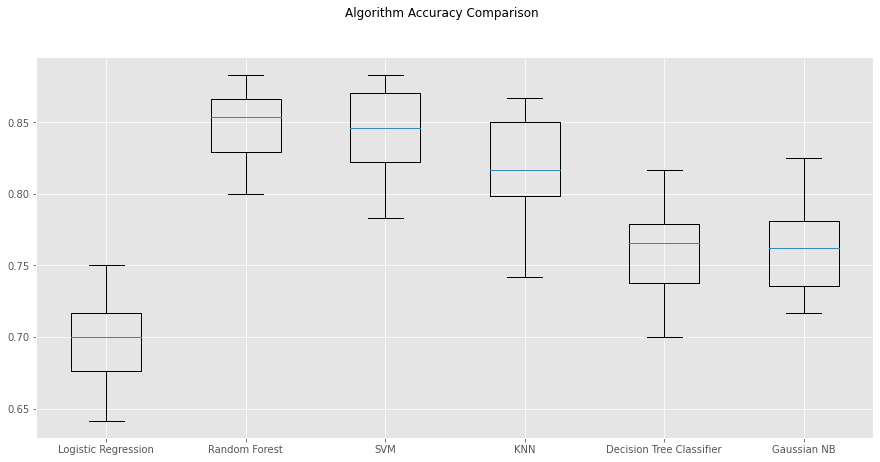

In [163]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

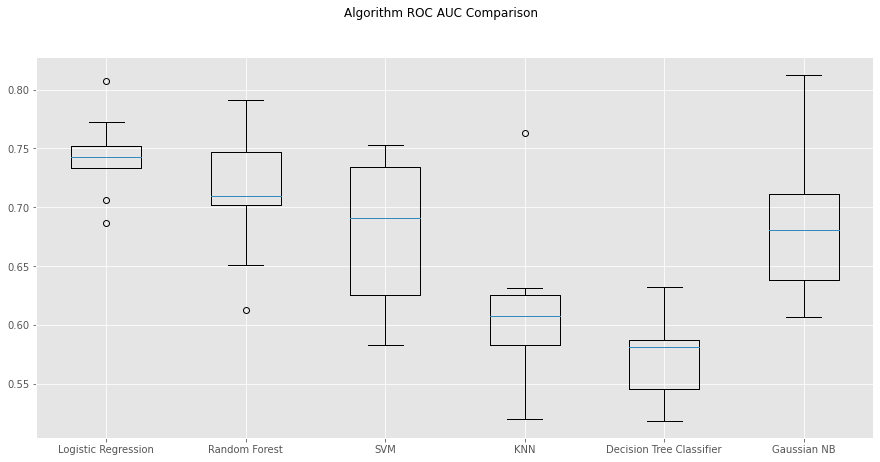

In [164]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Based on our ROC AUC comparison analysis, Logistic Regression and Random Forest show the highest mean AUC scores. We will shortlist these two algorithms for further analysis. See below for more details on these two algos.

In [165]:
y_test.value_counts()[0] / y_test.shape[0]

0.8366666666666667

In [217]:
#Measuring The number of people staying or leaving in the train and test data sets 

stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.81%
leaving Rate: 16.19%
===============TEST=================
Staying Rate: 83.67%
leaving Rate: 16.33%


In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

### **Logistic Regression** **&** **Confusion Matrics**

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. Logistic Regression is classification algorithm that is not as sophisticated as the ensemble methods or boosted decision trees method discussed below. Hence, it provides us with a good benchmark.

Train Accuracy : 0.86 %
Test Accuracy : 0.84 %


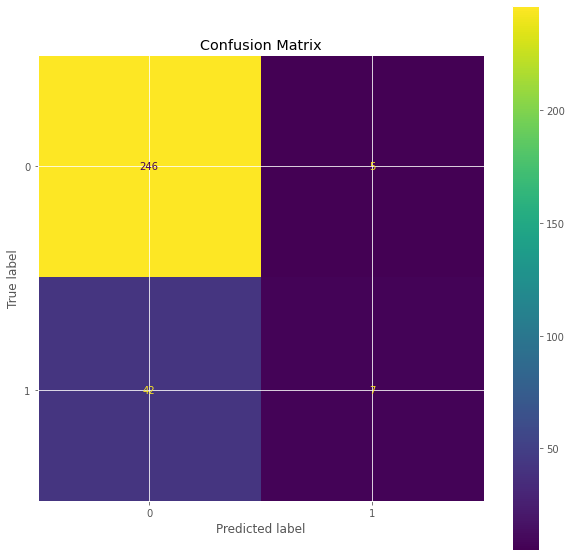

In [215]:
from sklearn.metrics import ConfusionMatrixDisplay

logistic_model = LogisticRegression(solver='liblinear',random_state=7).fit(X_train,y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),y_test)))

cm = confusion_matrix(y_test,logistic_model.predict(X_test))
classes = ["0","1"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

**Observation from Logistics Regression**

1. Our result is out of 300 target value.
2. The Train & Test Accuracy is 0.86% and 0.84% respectively.
3. Out of 300 target value our model predicted 253 value and confused about 47 value. Which is pretty much good guess.
4. Our model is predicting 246 people will not leave the company & only 7 people will leave the company.
5. The model is skeptic about the rest of the 47 people and confused aroud it.
6. The output provides a first index referring to the probability that the data belong to class 0 (employee not leaving), and the second refers to the probability that the data belong to class 1 (employee leaving). 

### **Random Forest Classifier (RFC)**

Random Forest is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

Random Forest fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.

Train Accuracy : 1.00 %
Test Accuracy : 0.84 %


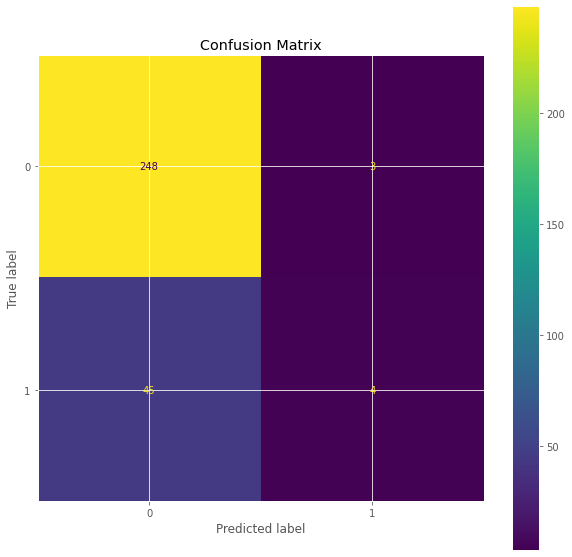

In [169]:
random_forest = RandomForestClassifier(n_estimators=590,
                                       random_state=7).fit(X_train,y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),y_test)))

cm = confusion_matrix(y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [171]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [172]:
model_rf = RandomForestRegressor(n_estimators=25)

In [173]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

In [174]:
print('Model RF' + ' ' + str(model_rf.score(X_test, y_test)))

Model RF 0.002611682880948152


In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

# scorer = make_scorer(r2_score)
scorer = make_scorer(mean_squared_error)

In [176]:
model_rf = RandomForestRegressor()

In [177]:
parameters_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [25, 50]}

In [178]:
# erform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(model_rf, parameters_rf, scoring=scorer)

In [179]:
grid_obj

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_error))

In [180]:
grid_fit = grid_obj.fit(X_train, y_train)

In [181]:
# Get the estimator.
best_reg = grid_fit.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, n_estimators=25)

In [182]:
# Model performance on TRAIN data
best_reg.score(X_train, y_train)

1.0

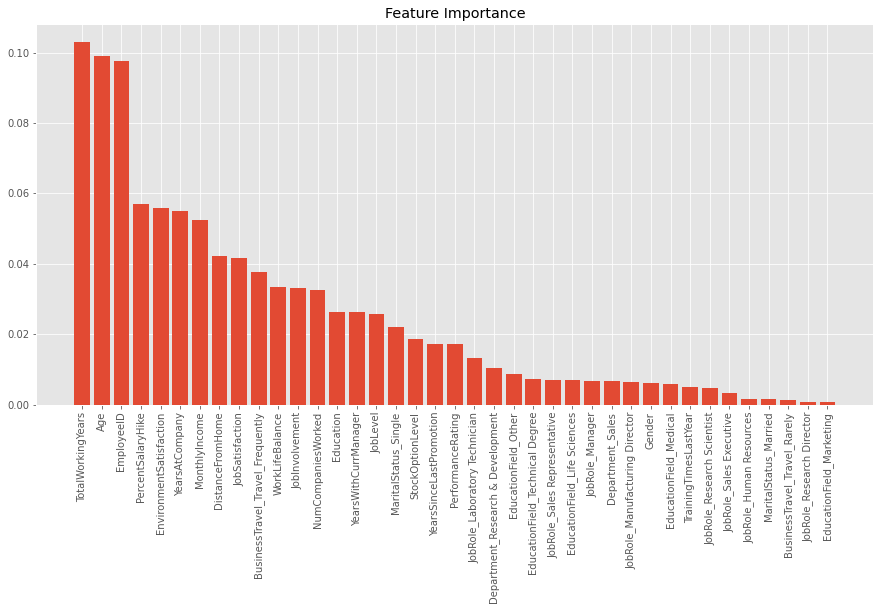

In [183]:
importances = best_reg.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [184]:
importances = best_reg.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(38):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,TotalWorkingYears,0.102931
1,Age,0.099088
2,EmployeeID,0.097662
3,PercentSalaryHike,0.057094
4,EnvironmentSatisfaction,0.055964
5,YearsAtCompany,0.055070
6,MonthlyIncome,0.052540
7,DistanceFromHome,0.042100
8,JobSatisfaction,0.041634
9,BusinessTravel_Travel_Frequently,0.037681


**Observation from Random Forest Classifier (RFC)**

1. Our result is out of 300 target value.
2. The Train & Test Accuracy is 1.00% and 0.84% respectively.
3. Out of 300 target value our model predicted 252 value and confused about 48 value. Which is pretty much good guess.
4. Our model is predicting 248 people will not leave the company & only 3 people will leave the company.
5. The model is skeptic about the rest of the 48 people and confused aroud it.
6. The output provides a first index referring to the probability that the data belong to class 0 (employee not leaving), and the second refers to the probability that the data belong to class 1 (employee leaving).
7. After plotting the RFC model we found that Totalk working year, age and percent salary hike was the top 3 reason for the employee to leave.
8. There are other several reasons listed on the top for better clarification.

### **XGBClassifier**

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

Train Accuracy : 0.94 %
Test Accuracy : 0.84 %


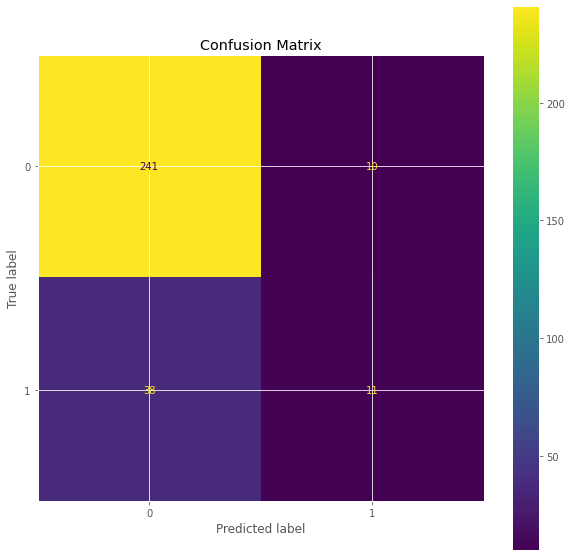

In [187]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.01,n_estimators=2000,use_label_encoder=False,random_state=420).fit(X_train,y_train)

print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test),y_test)))

cm = confusion_matrix(y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

**Observation from XGBClassifier**

1. Our result is out of 300 target value.
2. The Train & Test Accuracy is 0.94% and 0.84% respectively.
3. Out of 300 target value our model predicted 252 value and confused about 48 value. Which is pretty much good guess.
4. Our model is predicting 241 people will not leave the company & only 11 people will leave the company.
5. The model is skeptic about the rest of the 48 people and confused aroud it.
6. The output provides a first index referring to the probability that the data belong to class 0 (employee not leaving), and the second refers to the probability that the data belong to class 1 (employee leaving).

### **Elastic Net**

In statistics and, in particular, in the fitting of linear or logistic regression models, the elastic net is a regularized regression method that linearly combines the L₁ and L₂ penalties of the lasso and ridge methods.

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

# scorer1 = make_scorer(r2_score)
scorer1 = make_scorer(mean_squared_error)

In [250]:
model_el1 = ElasticNet()

In [251]:
model_el1.fit(X_train, y_train)

ElasticNet()

In [253]:
print('Model EL1' + ' ' + str(model_el1.score(X_test, y_test)))

Model EL1 -1.4187898643491792e-05


In [254]:
parameters_el1 = {'alpha':[0.1, 0.5, 1.0], 
                 'l1_ratio':[0.1, 0.5, 0.75]}

In [255]:
# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(model_el1, parameters_el1, scoring=scorer1)

In [256]:
grid_obj

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1.0],
                         'l1_ratio': [0.1, 0.5, 0.75]},
             scoring=make_scorer(mean_squared_error))

In [257]:
grid_fit1 = grid_obj.fit(X_train, y_train)

In [258]:
# Get the estimator.
best_reg1 = grid_fit1.best_estimator_

# Fit the new model.
best_reg1.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [259]:
best_reg1.score(X_test, y_test) #Mean Square Error (MSE)

-1.4187898643491792e-05

**Strategic Retention Plan**

**The stronger indicators of people leaving include:**

1. Monthly Income: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
2. YearsWithCurrManager: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken with a Line Manager:
- number of employees under managers showing high turnover rates: this would indicate that the organisation's structure may need to be revisit to improve efficiency
- number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation
-patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.
3. Age: Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.
4. DistanceFromHome: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
5. TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.
6. YearsAtCompany: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.

A strategic "Retention Plan" should be drawn for each Risk Category group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions. Also, a meeting with those employee's Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.